<a href="https://colab.research.google.com/github/mixkunanon/Data-Engineer-Master/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Analytics - Churn Prediction 

## Import libraries and module

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## EDA - Exploratory Data Analysis

### The Dunhubby - the Complete Journey
>   This dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included

Ref : Dunhubby - Retail Customer 

** List of Dataset  **
1.   Transaction Data
2.   Household Demographic



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Household Demographic

> ข้อมูลกลุ่มตัวอย่างจำนวน 2500 ครัวเรือน

In [10]:
#household demographic data
df_hh = pd.read_csv('/content/drive/MyDrive/Dataset/hh_demographic.csv')

In [11]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [12]:
df_hh.shape

(801, 8)

In [13]:
df_hh.head(10)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
5,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,17
6,45-54,A,100-124K,Homeowner,2 Adults No Kids,2,None/Unknown,18
7,35-44,B,15-24K,Unknown,Single Female,1,None/Unknown,19
8,25-34,A,75-99K,Renter,2 Adults No Kids,2,None/Unknown,20
9,45-54,A,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown,22


In [14]:
#check missing values
df_hh.isna().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

In [138]:
#plot pie chart
def pie_categorical(df,feature):
    plt.figure(figsize=(20,6))
    df[feature].value_counts().plot(kind="pie",autopct="%.1f%%")
    #title
    plt.ylabel("")
    plt.title(label=feature,fontweight="bold",fontsize=8)
    #legend and show
    plt.legend()
    plt.show()

#bar plot
def bar_categorical(df,feature):
    plt.figure(figsize=(10,6))
    df[feature].value_counts().plot(kind='bar')
    #title
    plt.ylabel("")
    plt.title(label=feature,fontweight="bold",fontsize=8)  
    #legend and show
    plt.show()


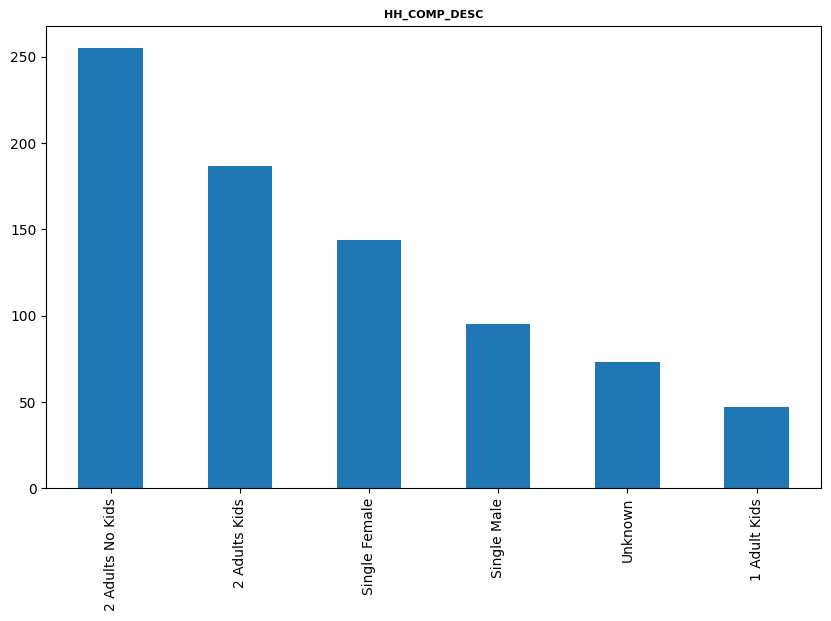

In [139]:
#ข้อมูลแต่ละครัวเรือน
bar_categorical(df_hh.drop("household_key",axis=1),'HH_COMP_DESC')

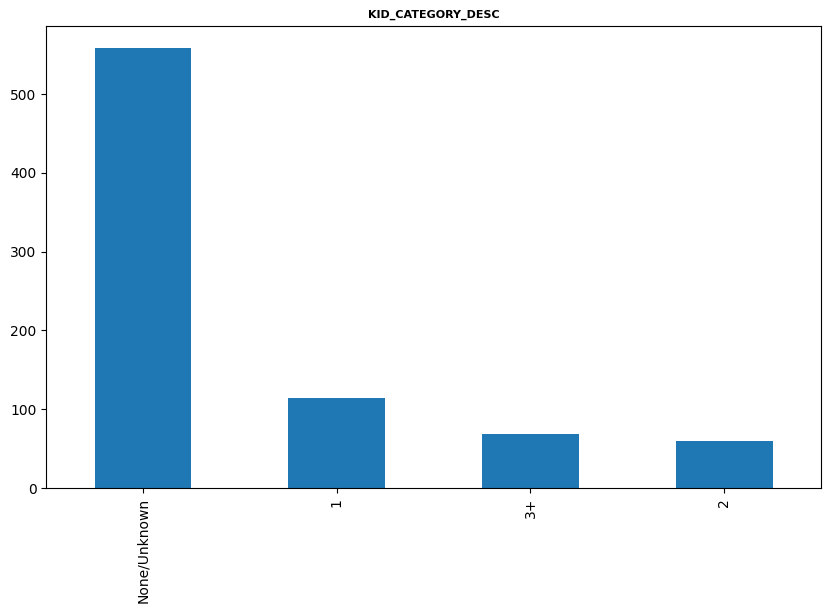

In [140]:
#ข้อมูลของจำนวนเด็กของแต่ละครัวเรือน
bar_categorical(df_hh.drop("household_key",axis=1),'KID_CATEGORY_DESC')

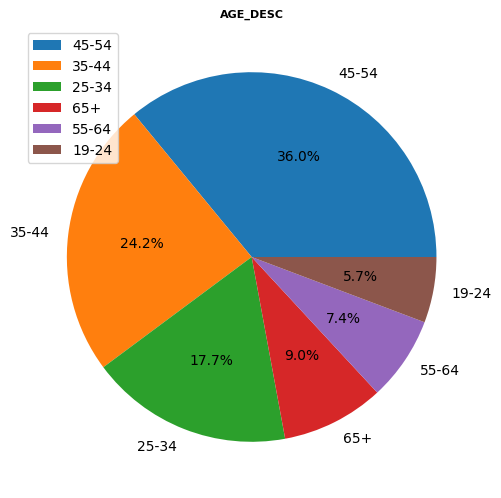

In [22]:
#ช่วงอายุของกลุ่มตัวอย่าง
pie_categorical(df_hh.drop("household_key",axis=1),'AGE_DESC')

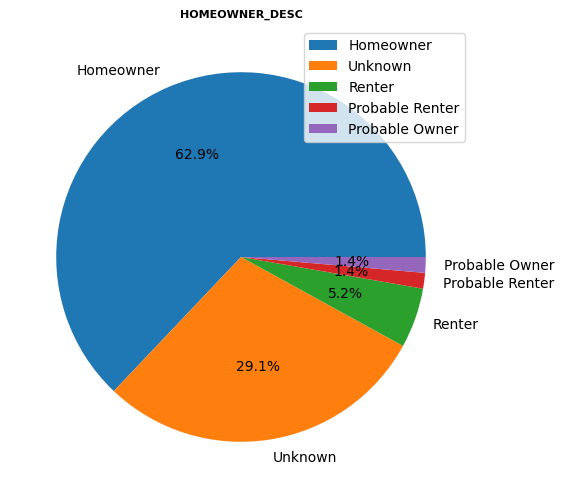

In [17]:
#กลุ่มของที่อยู่อาศัยของกลุ่มตัวอย่าง  
pie_categorical(df_hh.drop("household_key",axis=1),'HOMEOWNER_DESC')

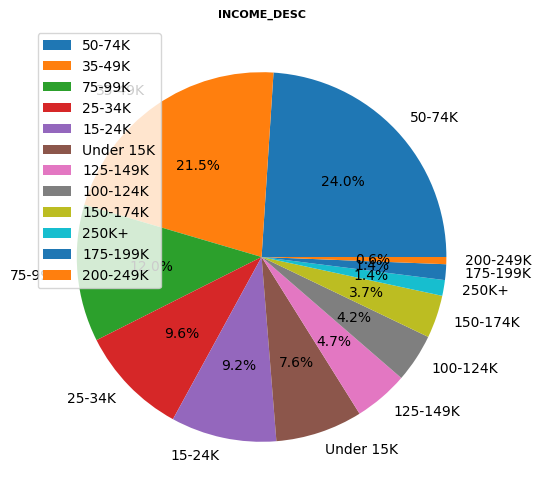

In [18]:
#กลุ่มรายได้ของกลุ่มตัวอย่าง
pie_categorical(df_hh.drop("household_key",axis=1),'INCOME_DESC')

#### Transaction Data
    

>Transactional data contains purchase history of each household. It contains the product ID and sales value, store ID and all other transactional features.

In [20]:
#csv to dataframe 
df_ts = pd.read_csv('/content/drive/MyDrive/Dataset/transaction_data.csv')

df_ts.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [23]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [24]:
df_ts.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06
mean,1.271953e+03,3.402620e+10,3.887562e+02,2.891435e+06,1.004286e+02,3.104120e+00,3.142673e+03,-5.387054e-01,1.561586e+03,5.622150e+01,-1.641600e-02,-2.918564e-03
std,7.260660e+02,4.711649e+09,1.897210e+02,3.837404e+06,1.153436e+03,4.182274e+00,8.937113e+03,1.249191e+00,3.998378e+02,2.710223e+01,2.168410e-01,3.969004e-02
min,1.000000e+00,2.698485e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.800000e+02,0.000000e+00,1.000000e+00,-5.593000e+01,-7.700000e+00
25%,6.560000e+02,3.040805e+10,2.290000e+02,9.174590e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.900000e-01,1.308000e+03,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.272000e+03,3.276081e+10,3.900000e+02,1.028816e+06,1.000000e+00,2.000000e+00,3.720000e+02,-1.000000e-02,1.613000e+03,5.600000e+01,0.000000e+00,0.000000e+00
75%,1.913000e+03,4.012685e+10,5.530000e+02,1.133018e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,1.843000e+03,8.000000e+01,0.000000e+00,0.000000e+00
max,2.500000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,2.359000e+03,1.020000e+02,0.000000e+00,0.000000e+00


In [25]:
#total row and columns
df_ts.shape

(2595732, 12)

In [26]:
#missing values each columns
df_ts.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [27]:
#unique household count
total_household = len(df_ts['household_key'].unique())

print(f'total is {total_household}')

total is 2500


In [ ]:
#top product 20 ID
top20_product = df_ts.groupby(by='PRODUCT_ID').agg({'QUANTITY' : 'sum','SALES_VALUE':'sum'}).sort_values(by = 'QUANTITY',ascending=False).head(20)

top20_product

Text(0.5, 1.0, 'Top 20 Product')

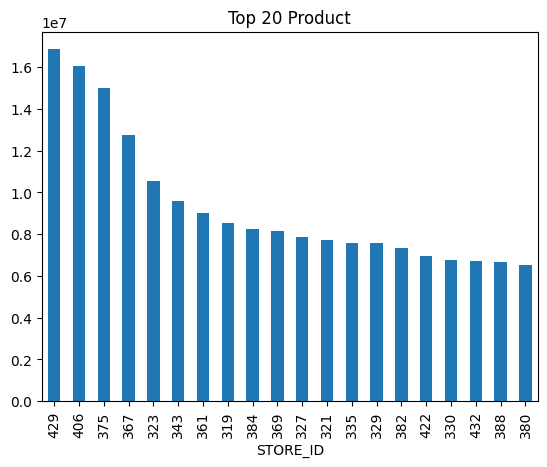

In [132]:
top20_product['QUANTITY'].plot.bar()
plt.title('Top 20 Product',fontsize = 12)

In [91]:
#top 20 customer ID
top20_customers = df_ts.groupby(by="household_key").agg({'QUANTITY' : 'sum','SALES_VALUE':'sum'}).sort_values(by='QUANTITY',ascending=False).head(20)

top20_customers

,QUANTITY,SALES_VALUE
household_key,,
1023,4479917,38319.79
755,3141769,10617.05
1609,2146715,27859.68
2115,1976712,14774.86
13,1863829,13190.92
1430,1741892,20352.99
1527,1734632,17295.18
1762,1669880,15360.14
707,1640193,19194.42


Text(0.5, 1.0, 'Top 20 Customer')

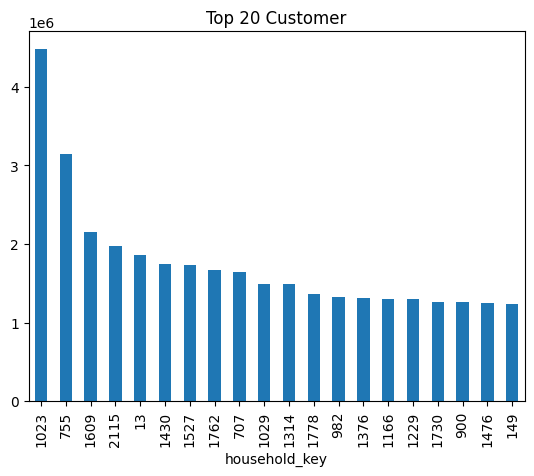

In [133]:
top20_customers['QUANTITY'].plot.bar()
plt.title('Top 20 Customer',fontsize = 12)

In [134]:
#top store 20 ID
top20_store = df_ts.groupby(by='STORE_ID').agg({'QUANTITY' : 'sum','SALES_VALUE':'sum'}).sort_values(by = 'QUANTITY',ascending=False).head(20)

top20_store

,QUANTITY,SALES_VALUE
STORE_ID,,
429,16860489,142391.01
406,16044214,216781.77
375,14993687,130396.51
367,12743472,267614.34
323,10552648,116672.42
343,9582406,140455.75
361,9012499,144698.85
319,8515166,117782.21
384,8263507,101058.79


Text(0.5, 1.0, 'Top 20 Store')

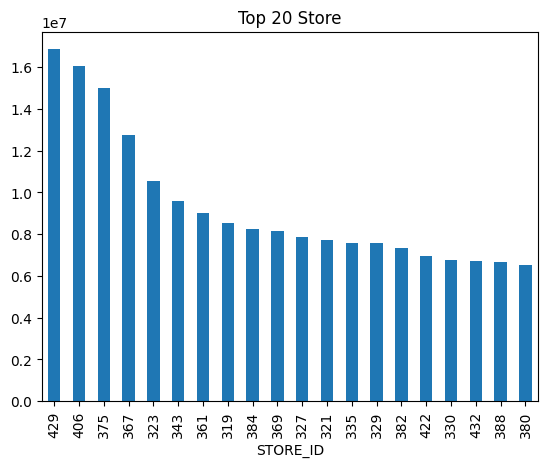

In [135]:
top20_store['QUANTITY'].plot.bar()
plt.title('Top 20 Store',fontsize = 12)

In [152]:
#Time Series Analysis by Day
day_df = df_ts.groupby(by='DAY').agg({'QUANTITY':'sum','SALES_VALUE':'sum'})

day_df

,QUANTITY,SALES_VALUE
DAY,,
1,302,549.31
2,156,458.91
3,678,1560.37
4,849,1785.64
5,368,856.93
...,...,...
707,409667,10632.36
708,445522,9949.90
709,355172,11245.74


Text(0.5, 1.0, 'Sales Value by Day')

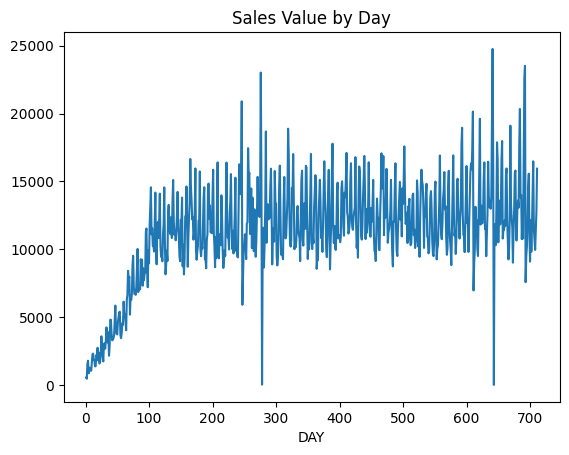

In [157]:
day_df['SALES_VALUE'].plot.line()
plt.title('Sales Value by Day')

In [153]:
#Time Series Analysis by Week
week_df = df_ts.groupby(by='WEEK_NO').agg({'QUANTITY':'sum','SALES_VALUE':'sum'})

week_df

,QUANTITY,SALES_VALUE
WEEK_NO,,
1,2353,5211.16
2,7223,10821.35
3,57776,13498.20
4,76865,15965.99
5,101706,20139.82
...,...,...
98,3300627,98949.62
99,2974164,101363.92
100,2361141,93063.10


Text(0.5, 1.0, 'Sales Value by Week')

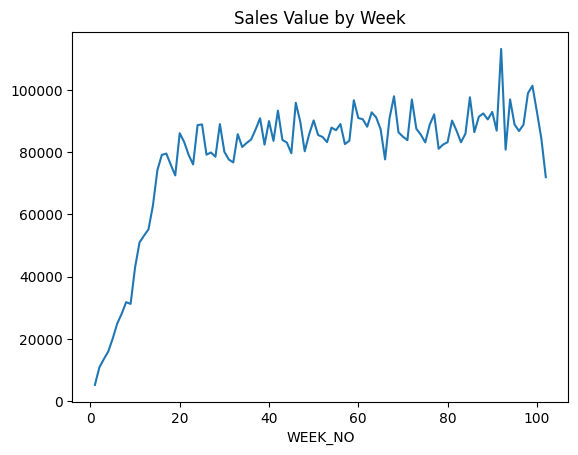

In [158]:
week_df['SALES_VALUE'].plot.line()
plt.title('Sales Value by Week')

## Churn Prediction


Let's define transactional churn

In [31]:
#weekly customer purchase amount
weekly_purchase = df_ts.groupby(["household_key","WEEK_NO"]).agg({"SALES_VALUE":sum})

weekly_purchase = weekly_purchase.unstack()

In [32]:
#จาก 102 week มีการใช้จ่ายอย่างไรบ้าง
weekly_purchase

SALES_VALUE                                           ...  \
WEEK_NO               1   2   3   4   5   6   7      8   9     10   ...   
household_key                                                       ...   
1                     NaN NaN NaN NaN NaN NaN NaN  78.66 NaN  41.1  ...   
2                     NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   
3                     NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   
4                     NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   
5                     NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   
...                   ...  ..  ..  ..  ..  ..  ..    ...  ..   ...  ...   
2496                  NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   
2497                  NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   
2498                  NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   
2499                  NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   
2500                  NaN NaN NaN NaN NaN NaN NaN    NaN NaN   NaN  ...   

                                                                               \
WEEK_NO           93      94      95      96      97      98      99      100   
household_key                                                                   
1               41.57     NaN   90.21     NaN   79.07     NaN  118.56   91.33   
2                 NaN     NaN     NaN  130.89     NaN     NaN     NaN     NaN   
3                 NaN     NaN     NaN     NaN   22.53     NaN     NaN     NaN   
4                 NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   16.98   
...               ...     ...     ...     ...     ...     ...     ...     ...   
2496              NaN     NaN   10.00     NaN  109.32  125.05     NaN     NaN   
2497           160.93   52.25  301.52   26.00   36.00     NaN   63.16   46.97   
2498            38.59   17.31   18.65    2.00    9.64   14.83   11.58    4.99   
2499              NaN     NaN     NaN    6.68  210.83     NaN     NaN   11.87   
2500            73.66  127.24  119.15     NaN  132.95  101.67   73.44  108.22   

                              
WEEK_NO           101    102  
household_key                 
1                 NaN  81.29  
2                 NaN    NaN  
3               36.38    NaN  
4                 NaN    NaN  
5               12.99    NaN  
...               ...    ...  
2496              NaN    NaN  
2497            91.18    NaN  
2498            11.98  37.19  
2499           280.92   9.38  
2500            73.65  59.07  

[2500 rows x 102 columns]

In [33]:
#sample each household
weekly_purchase.loc[100].dropna().index[-1][1]

99

<ipython-input-34-ad60ef7e9840>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(churn_df["No. of Churned Weeks"],kde=False)


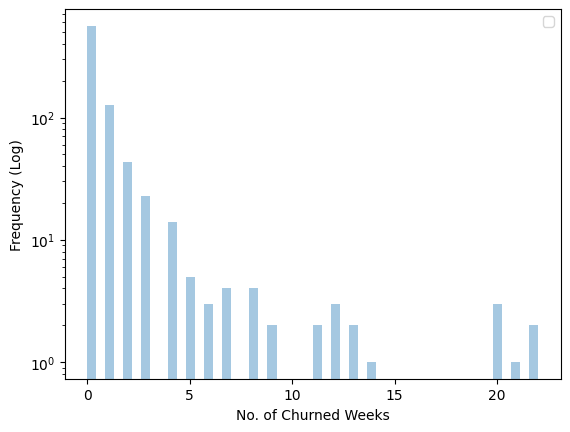

In [34]:
#last week purchase 
churn_weeks = []
common_houses = set(df_hh.household_key) & set(df_ts.household_key)
for house in common_houses:
  lastweek_purchase = int(weekly_purchase.loc[house].dropna().index[-1][1])
  #last week each household key
  churn_weeks.append(102-lastweek_purchase)

#use log scale to visulization
churn_df = pd.DataFrame(list(zip(common_houses,churn_weeks)),columns=["household_key","No. of Churned Weeks"])
ax = sns.distplot(churn_df["No. of Churned Weeks"],kde=False)
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("Frequency (Log)")
plt.show()

In [35]:
#let check distribution statistic of churn distribution
def stat_show(df):
    print("Mean:", df['No. of Churned Weeks'].mean())
    print("Median:", df['No. of Churned Weeks'].median())
    print("Max:", df['No. of Churned Weeks'].max())
    print("Min:", df['No. of Churned Weeks'].min())
    print("Standard Deviation:", df['No. of Churned Weeks'].std())

    # Find quantiles
    quantile_25 = df['No. of Churned Weeks'].quantile(0.25)
    quantile_50 = df['No. of Churned Weeks'].quantile(0.5)
    quantile_75 = df['No. of Churned Weeks'].quantile(0.75)
    print("25th Percentile:", quantile_25)
    print("50th Percentile (Median):", quantile_50)
    print("75th Percentile:", quantile_75)

stat_show(churn_df)

Mean: 0.8514357053682896
Median: 0.0
Max: 22
Min: 0
Standard Deviation: 2.4528862715530724
25th Percentile: 0.0
50th Percentile (Median): 0.0
75th Percentile: 1.0


In [36]:
#let assume 4 weeks or 1 month is churn จาก mean and standard deviation 
churn_df["isChurned"] = churn_df["No. of Churned Weeks"] >= 4

In [46]:
churn_df = churn_df.drop(columns='No. of Churned Weeks')

In [47]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  801 non-null    int64
 1   isChurned      801 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 7.2 KB


In [110]:
churn_df

,household_key,isChurned
0,1,False
1,2050,False
2,2053,False
3,7,False
4,8,False
...,...,...
796,2023,False
797,2024,False
798,2030,False
799,2040,False


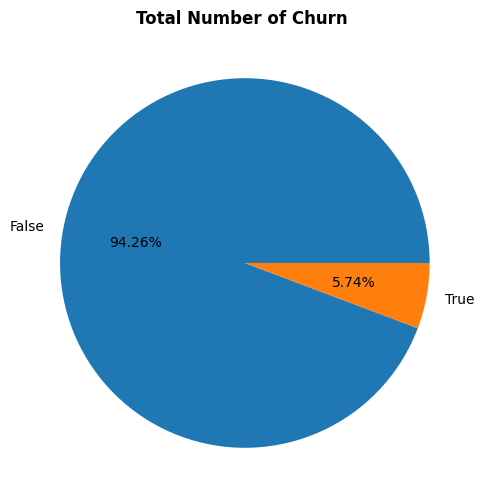

In [48]:
#pie plot number of churn
plt.figure(figsize=(10,6))
churn_df['isChurned'].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title("Total Number of Churn ",fontweight="bold")
plt.ylabel('')
plt.show()

## Train the Model

Main Part
- Feature Engineering
- Train the Model
- Evaluate the Model
- Summary

### Feature Engineering

In [79]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

In [49]:
#merge data final demogrphical and churn 
df = pd.merge(churn_df,df_hh,on="household_key",how="left") 

df 

,household_key,isChurned,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,1,False,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,2050,False,35-44,A,25-34K,Homeowner,2 Adults Kids,5+,3+
2,2053,False,45-54,A,15-24K,Homeowner,2 Adults No Kids,2,None/Unknown
3,7,False,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
4,8,False,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
...,...,...,...,...,...,...,...,...,...
796,2023,False,45-54,U,35-49K,Homeowner,2 Adults Kids,3,1
797,2024,False,25-34,B,125-149K,Homeowner,2 Adults No Kids,2,None/Unknown
798,2030,False,35-44,B,75-99K,Homeowner,Single Female,1,None/Unknown
799,2040,False,25-34,U,25-34K,Homeowner,Single Male,1,None/Unknown


In [69]:
#one hot encoding categorical type
encoded = pd.get_dummies(df[df.columns[df.dtypes==object]])
data_encoded = pd.concat([encoded, df[df.columns[df.dtypes != object]]],axis=1)

In [73]:
data_encoded

,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,...,HOUSEHOLD_SIZE_DESC_2,HOUSEHOLD_SIZE_DESC_3,HOUSEHOLD_SIZE_DESC_4,HOUSEHOLD_SIZE_DESC_5+,KID_CATEGORY_DESC_1,KID_CATEGORY_DESC_2,KID_CATEGORY_DESC_3+,KID_CATEGORY_DESC_None/Unknown,household_key,isChurned
0,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,1,False
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,2050,False
2,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,2053,False
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,7,False
4,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,2023,False
797,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,2024,False
798,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,2030,False
799,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2040,False


### Train the Model

In [74]:
#define x , y 
X = data_encoded.drop(["isChurned","household_key"],axis=1)
y = data_encoded['isChurned']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#XGBoost train
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)

In [75]:
X_train.shape,X_test.shape

((600, 41), (201, 41))

In [112]:
X

,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,...,HH_COMP_DESC_Unknown,HOUSEHOLD_SIZE_DESC_1,HOUSEHOLD_SIZE_DESC_2,HOUSEHOLD_SIZE_DESC_3,HOUSEHOLD_SIZE_DESC_4,HOUSEHOLD_SIZE_DESC_5+,KID_CATEGORY_DESC_1,KID_CATEGORY_DESC_2,KID_CATEGORY_DESC_3+,KID_CATEGORY_DESC_None/Unknown
0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
797,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
798,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
799,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [76]:
xgb_mdl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [111]:
xgb_mdl.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>

### Evaluate the Model

Train Data Classification Report:

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       566
        True       0.94      0.50      0.65        34

    accuracy                           0.97       600
   macro avg       0.96      0.75      0.82       600
weighted avg       0.97      0.97      0.97       600

Test Data Classification Report:

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       189
        True       0.00      0.00      0.00        12

    accuracy                           0.93       201
   macro avg       0.47      0.49      0.48       201
weighted avg       0.88      0.93      0.90       201



[Text(0.5, 23.52222222222222, 'predicted values'),
 Text(50.722222222222214, 0.5, 'real values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

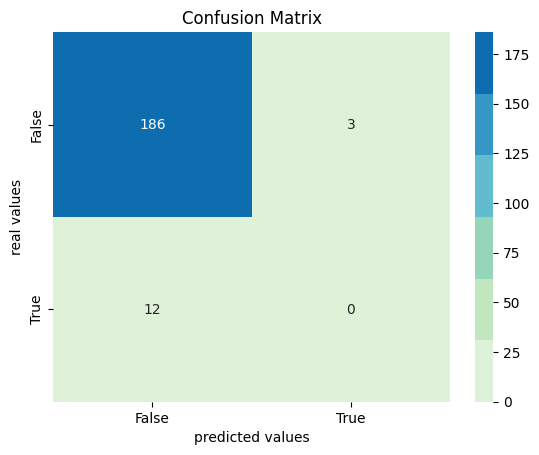

In [80]:
##XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

###Summary 

> จาก Feature Importance -- > ปัจจัยใดบ้างที่มีผลต่อ churn prediction จากข้อมูลประชากร

In [116]:
#plot feature importance
feat_imp = pd.DataFrame(list(zip(X.columns,xgb_mdl.feature_importances_)),columns=["Feature","Importance"]).sort_values(by="Importance",ascending=False)

feat_imp

,Feature,Importance
26,HH_COMP_DESC_1 Adult Kids,0.058970
37,KID_CATEGORY_DESC_1,0.054777
32,HOUSEHOLD_SIZE_DESC_1,0.041500
9,INCOME_DESC_100-124K,0.041346
0,AGE_DESC_19-24,0.040271
33,HOUSEHOLD_SIZE_DESC_2,0.036818
6,MARITAL_STATUS_CODE_A,0.034993
40,KID_CATEGORY_DESC_None/Unknown,0.033271
27,HH_COMP_DESC_2 Adults Kids,0.032396
29,HH_COMP_DESC_Single Female,0.031504


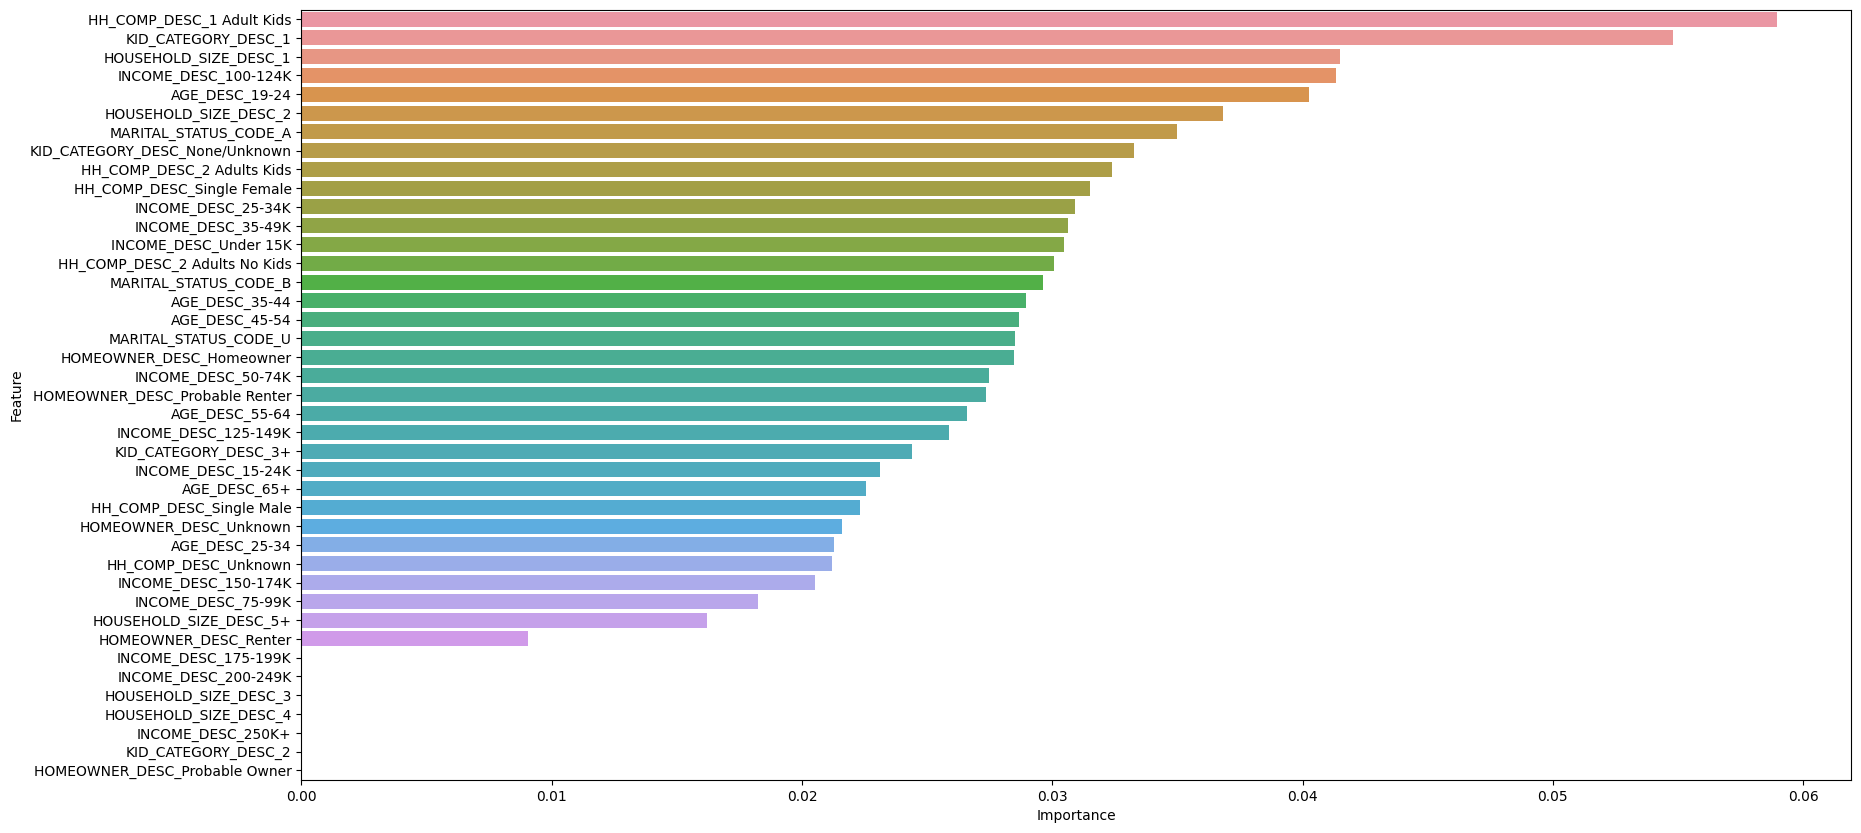

In [119]:
#plot feaute importance of model
plt.figure(figsize=(20,10))
sns.barplot(y="Feature",x="Importance",data = feat_imp,orient="h")
plt.show()